# GPU vs CPU: Why do you use GPU for deep learning number crunching

---

In this exercise, we are going to use TensorFlow and GPU for matrix multiplication. We will benchmark the running time for both CPUs and GPUs.

Most code is based on https://medium.com/@erikhallstrm/hello-world-tensorflow-649b15aed18c

Instructions:


* Make a copy of the notebook in your Google Drive (via the "File - Save a copy in Google Drive" option).
* rename your copy to "YourName-Copy Why GPU.ipynb"
* Select "GPU" via "Runtime - change runtime type - hardware accelerator"
* Run the notebook block by block, producing the results
* Answer the question at the bottom.
* Save the notebook by "File - Download .ipynb" to your local drive
* Make sure your results are also saved within the notebook
* Submit the sharable link to your colab notebook and the downloaded notebook to Canvas.





In [1]:
# First, we import the right libraries
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time

# here is the main subroutine
def get_times(maximum_time):
    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(50,5000,50)
    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Now run the test
device_times, matrix_sizes = get_times(1.5)

####### Calculating on the /gpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[[12.766 12.08  12.86  ...  9.23  11.875 11.14 ]
 [12.625 12.266 14.18  ... 11.17  12.125 11.266]
 [12.6   13.39  12.77  ... 10.28  12.39  11.266]
 ...
 [12.55  12.25  10.83  ...  8.99   9.81  11.06 ]
 [10.555 10.63  11.5   ...  8.21   9.195  8.77 ]
 [13.31  13.38  13.68  ... 10.14  12.14  12.14 ]]
{'/gpu:0': [0.2775309085845947], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[[12.5    9.98  10.73  ... 11.055 10.93  12.92 ]
 [13.58  12.375 12.26  ... 10.59  11.02  12.55 ]
 [13.43  12.27  12.305 ... 10.41  11.01  13.45 ]
 ...
 [10.1    8.91  10.31  ...  9.29   9.11  11.586]
 [12.79  10.87  12.13  ... 10.32  10.13  13.   ]
 [13.53  12.08  12.31  ... 10.61  1

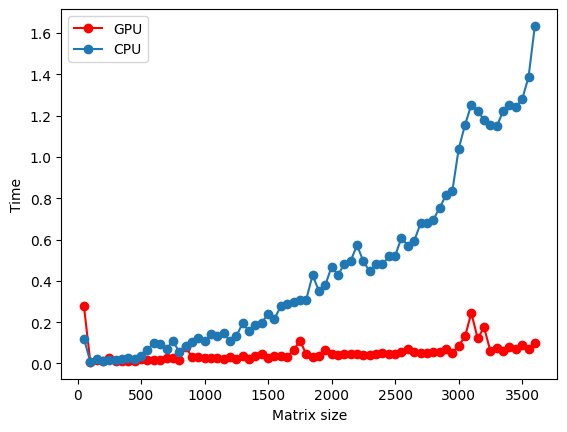

In [3]:
# plotting
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'ro-',label='GPU')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-',label='CPU')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.legend(loc="upper left")
plt.show()
# view raw0-matrix.py hosted with ❤ by GitHub



**Now, please describe in this text box what happend (in particular, how CPU and GPU run time increases with matrix sizes) and what is the conclusion. Please use 1-5 sentences, and then save the notebook and submit it.**

According to the code, the function was calculating the dot product using both CPU and GPU of the matrix from size 50x50 and increased the matrix size by 50 after each iteration and set the maximum matrix size as 5000x5000. From the result plot, we found that as the matrix size increases, the run time gradually increases when using CPU for calculation, furthermore, as the matrix size become larger, the run time from CPU also grows more faster. On the other hand, when using GPU for calculating the dot porduct of the matrix, the run time seems to be stable and maintained as the matrix size increases. In conclusion, when doing some computational heavy projects, GPU might do a better job on saving time.